In [56]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(
    style="whitegrid",
    font_scale=1.25
)

suburb_data = pd.read_csv(
    "./gayburbs.csv",
    index_col="code"
)

suburb_geodata = gpd.read_file(
    "./SAL_2021_AUST_GDA2020_SHP.zip"
).iloc[:, [0, 6, 10]]
suburb_geodata.columns = ["code", "area", "geometry"]
suburb_geodata.set_index("code", inplace=True)
suburb_geodata = suburb_geodata[suburb_geodata["area"] > 0]

city_geodata = gpd.read_file(
    "./SA4_2021_AUST_SHP_GDA2020.zip"
).iloc[:, [0, 1, 10, 12]]
city_geodata.columns = ["code", "name", "area", "geometry"]
city_geodata.set_index("code", inplace=True)
city_geodata = city_geodata[city_geodata["area"] > 0]

In [81]:
lines = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=4),
    Line2D([0], [0], color=sns.color_palette()[2], lw=4)
]

for city in ["801"]: #city_geodata.index[:5]:
    print("analysing", city_geodata.at[city, "name"], "...")
    # suburbs_within = suburb_geodata[
    #     (suburb_geodata["geometry"].within(city_geodata.at[city, "geometry"]))
    # ]
    # suburbs_overlaps = suburb_geodata[
    #     (suburb_geodata["geometry"].overlaps(city_geodata.at[city, "geometry"]))
    # ]
    suburbs_intersects = suburb_geodata[
        (city_geodata.at[city, "geometry"].contains(suburb_geodata["geometry"]))
    ]
    fig, ax = plt.subplots(
        figsize=(10, 10),
        tight_layout=True
    )
    city_geodata.loc[city:city, :].boundary.plot(
        ax=ax,
        edgecolor=sns.color_palette()[0],
        linewidth=3
    )
    # suburbs_within.plot(
    #     ax=ax,
    #     alpha=.5,
    #     edgecolor="white",
    #     color=sns.color_palette()[1]
    # )
    # suburbs_overlaps.plot(
    #     ax=ax,
    #     alpha=.5,
    #     edgecolor="white",
    #     color=sns.color_palette()[2]
    # )
    suburbs_intersects.plot(
        ax=ax,
        alpha=.5,
        edgecolor="white",
        color=sns.color_palette()[2]
    )
    ax.set_axis_off()
    plt.title(
        city_geodata.at[city, "name"],
        fontweight="bold",
        fontsize="large"
    )
    ax.legend(
        lines,
        ["SA4 boundary", "overlays SA4"]
    )
    plt.savefig("./eg_contains.jpg")
    plt.show()

analysing Australian Capital Territory ...


AttributeError: 'GeoSeries' object has no attribute '_geom'

In [79]:
city_geodata

name          area  \
code                                               
101                 Capital Region  5.189624e+04   
102                  Central Coast  1.681009e+03   
103                   Central West  7.029706e+04   
104        Coffs Harbour - Grafton  1.322976e+04   
105             Far West and Orana  3.393556e+05   
...                            ...           ...   
604            West and North West  2.252479e+04   
701                         Darwin  3.167703e+03   
702   Northern Territory - Outback  1.344967e+06   
801   Australian Capital Territory  2.358133e+03   
901              Other Territories  2.557420e+02   

                                               geometry  
code                                                     
101   MULTIPOLYGON (((150.05261 -37.26253, 150.05251...  
102   MULTIPOLYGON (((151.31497 -33.55578, 151.31496...  
103   POLYGON ((150.14236 -32.34153, 150.14255 -32.3...  
104   MULTIPOLYGON (((153.07639 -30.42982, 153.07645...  
105   POLYGON ((148.67619 -29.50976, 148.67662 -29.5...  
...                                                 ...  
604   MULTIPOLYGON (((144.60439 -41.01001, 144.60443...  
701   MULTIPOLYGON (((130.99838 -12.16118, 130.99608...  
702   MULTIPOLYGON (((132.78392 -11.31694, 132.78315...  
801   POLYGON ((149.06239 -35.15910, 149.09134 -35.1...  
901   MULTIPOLYGON (((167.94747 -29.12757, 167.94748...  

[89 rows x 3 columns]

<AxesSubplot:>

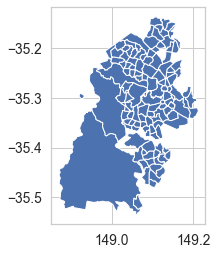

In [93]:
suburb_geodata[
    suburb_geodata["geometry"].apply(lambda x: city_geodata.at["801", "geometry"].covers(x))
].plot()